In [1]:
import pandas as pd
import numpy as np
xls = pd.ExcelFile('SELECTED_FOOD SEP_2019.xlsx')
states = xls.sheet_names
foreign_rice_Aug_states = []
foreign_rice_Sep_states = []
for sheet_name in states:
    df = pd.read_excel('SELECTED_FOOD SEP_2019.xlsx', sheet_name=sheet_name)
    foreign_rice_Aug = df.iloc[25,32]
    foreign_rice_Sep = df.iloc[25,33]
    foreign_rice_Aug_states.append(foreign_rice_Aug)
    foreign_rice_Sep_states.append(foreign_rice_Sep)

In [2]:
foreign_rice_Aug = pd.DataFrame(data=foreign_rice_Aug_states, index=None, columns =['Aug foreign Rice(Naira/Kg)'])
foreign_rice_Sep = pd.DataFrame(data=foreign_rice_Sep_states, index=None, columns =['Sept foreign Rice(Naira/Kg)'])
foreign_rice_Aug_Sep = pd.concat([foreign_rice_Sep, foreign_rice_Aug],axis=1, ignore_index=True)
foreign_rice_Aug_Sep['States'] = states
foreign_rice_Aug_Sep['Aug foreign Rice(Naira/Kg)'] = foreign_rice_Aug
foreign_rice_Aug_Sep['Sept foreign Rice(Naira/Kg)'] = foreign_rice_Sep
foreign_rice_Aug_Sep[[ 'States', 'Aug foreign Rice(Naira/Kg)', 'Sept foreign Rice(Naira/Kg)']]
foreign_rice_Aug_Sep.drop(index=37, inplace=True)
foreign_rice_Aug_Sep.drop(foreign_rice_Aug_Sep.iloc[:,0:2], axis =1, inplace=True)

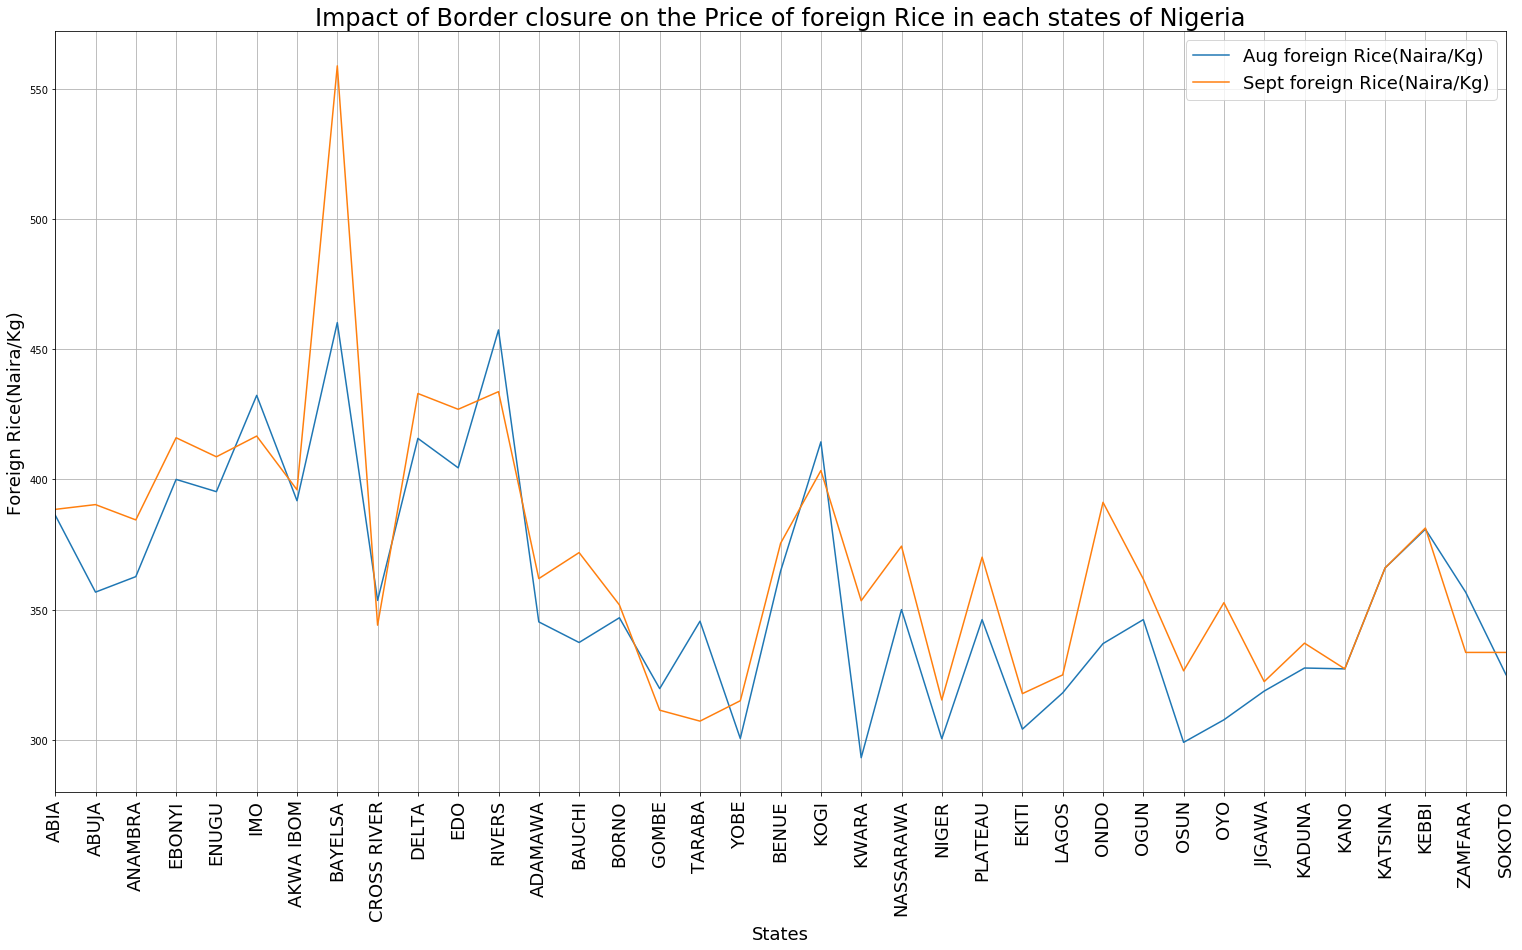

In [4]:
import matplotlib.pyplot as plt

ax2 = foreign_rice_Aug_Sep.plot(x='States', y=['Aug foreign Rice(Naira/Kg)', 'Sept foreign Rice(Naira/Kg)'], kind="line")
ax2.set_xticks(foreign_rice_Aug_Sep.index)
ax2.set_xticklabels(foreign_rice_Aug_Sep['States'], fontsize=18)
plt.ylabel('Foreign Rice(Naira/Kg)', fontsize=18)
plt.xlabel('States', fontsize=18)
plt.title('Impact of Border closure on the Price of foreign Rice in each states of Nigeria', fontsize=24)
ax2.legend(fontsize=18)
for item in ax2.get_xticklabels():
    item.set_rotation(90)

plt.grid(True)
plt.gcf().set_size_inches(26, 14)
plt.show()